# Assignment 2

Before working on this assignment please read these instructions fully. In the submission area, you will notice that you can click the link to **Preview the Grading** for each step of the assignment. This is the criteria that will be used for peer grading. Please familiarize yourself with the criteria before beginning the assignment.

An NOAA dataset has been stored in the file `data/C2A2_data/BinnedCsvs_d400/fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv`. This is the dataset to use for this assignment. Note: The data for this assignment comes from a subset of The National Centers for Environmental Information (NCEI) [Daily Global Historical Climatology Network](https://www1.ncdc.noaa.gov/pub/data/ghcn/daily/readme.txt) (GHCN-Daily). The GHCN-Daily is comprised of daily climate records from thousands of land surface stations across the globe.

Each row in the assignment datafile corresponds to a single observation.

The following variables are provided to you:

* **id** : station identification code
* **date** : date in YYYY-MM-DD format (e.g. 2012-01-24 = January 24, 2012)
* **element** : indicator of element type
    * TMAX : Maximum temperature (tenths of degrees C)
    * TMIN : Minimum temperature (tenths of degrees C)
* **value** : data value for element (tenths of degrees C)

For this assignment, you must:

1. Read the documentation and familiarize yourself with the dataset, then write some python code which returns a line graph of the record high and record low temperatures by day of the year over the period 2005-2014. The area between the record high and record low temperatures for each day should be shaded.
2. Overlay a scatter of the 2015 data for any points (highs and lows) for which the ten year record (2005-2014) record high or record low was broken in 2015.
3. Watch out for leap days (i.e. February 29th), it is reasonable to remove these points from the dataset for the purpose of this visualization.
4. Make the visual nice! Leverage principles from the first module in this course when developing your solution. Consider issues such as legends, labels, and chart junk.

The data you have been given is near **Ann Arbor, Michigan, United States**, and the stations the data comes from are shown on the map below.

In [308]:
# import matplotlib.pyplot as plt
# import mplleaflet
# import pandas as pd

# def leaflet_plot_stations(binsize, hashid):

#     df = pd.read_csv('data/C2A2_data/BinSize_d{}.csv'.format(binsize))

#     station_locations_by_hash = df[df['hash'] == hashid]

#     lons = station_locations_by_hash['LONGITUDE'].tolist()
#     lats = station_locations_by_hash['LATITUDE'].tolist()

#     plt.figure(figsize=(8,8))

#     plt.scatter(lons, lats, c='r', alpha=0.7, s=200)

#     return mplleaflet.display()

# leaflet_plot_stations(400,'fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89')

In [309]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
binsize = 'fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89'
# df = pd.read_csv('data/C2A2_data/BinnedCsvs_d400/{}.csv'.format(binsize))
df = pd.read_csv('{}.csv'.format(binsize))
df.shape
df.dtypes
df.head()

(165085, 4)

ID            object
Date          object
Element       object
Data_Value     int64
dtype: object

,ID,Date,Element,Data_Value
0,USW00094889,2014-11-12,TMAX,22
1,USC00208972,2009-04-29,TMIN,56
2,USC00200032,2008-05-26,TMAX,278
3,USC00205563,2005-11-11,TMAX,139
4,USC00200230,2014-02-27,TMAX,-106


## Check data

In [310]:
# df['Date'] = df['Date'].apply(pd.to_datetime)
df['Date'] = pd.to_datetime(df['Date'])
df.dtypes
df.head()

ID                    object
Date          datetime64[ns]
Element               object
Data_Value             int64
dtype: object

,ID,Date,Element,Data_Value
0,USW00094889,2014-11-12,TMAX,22
1,USC00208972,2009-04-29,TMIN,56
2,USC00200032,2008-05-26,TMAX,278
3,USC00205563,2005-11-11,TMAX,139
4,USC00200230,2014-02-27,TMAX,-106


### Partition df into 2005-2014 and 2015

In [311]:
df.index = df['Date']
df14 = df['2005':'2014'].sort_index()
df15 = df['2015'].sort_index()
len(df14) + len(df15)

print('df14 is subset of {} to {}'.format(df14.index[0].strftime('%Y-%m-%d'), df14.index[-1].strftime('%Y-%m-%d')))
print('df15 is subset of {} to {}'.format(df15.index[0].strftime('%Y-%m-%d'), df15.index[-1].strftime('%Y-%m-%d')))

165085

df14 is subset of 2005-01-01 to 2014-12-31
df15 is subset of 2015-01-01 to 2015-12-31


### Get min and max per day, regardless of station ID and year

In [312]:
# Get min and max per day, regardless of station ID and year
# Output will be two tables: table_14, table_15
dfs=[df14, df15]

for i, suffix in enumerate(range(14,16)):
    exec(f"table_{suffix} = dfs[i].groupby(dfs[i]['Date'].dt.strftime('%m-%d'))['Data_Value'].agg({{'TMAX': np.max, 'TMIN': np.min}})")
    exec(f'x = len(table_{suffix})')
    print(f'table_{suffix} has {x} records \n\n')
    exec(f"print(table_{suffix}.head(),'\\n\\n', table_{suffix}.tail(), '\\n\\n')")


C:\Users\tuttoaposto\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  """Entry point for launching an IPython kernel.


table_14 has 366 records 


       TMAX  TMIN
Date             
01-01   156  -160
01-02   139  -267
01-03   133  -267
01-04   106  -261
01-05   128  -150 

        TMAX  TMIN
Date             
12-27   189  -138
12-28   194  -166
12-29   128  -150
12-30   117  -144
12-31   139  -150 


table_15 has 365 records 


       TMAX  TMIN
Date             
01-01    11  -133
01-02    39  -122
01-03    39   -67
01-04    44   -88
01-05    28  -155 

        TMAX  TMIN
Date             
12-27    83    -6
12-28    61   -39
12-29   100   -39
12-30    67   -22
12-31    17   -56 




### Remove date 02-29

In [313]:
table_14['02':'03'].index
table_15['02':'03'].index
table_14.drop('02-29', axis=0, inplace=True)
table_14['02':'03'].index

Index(['02-01', '02-02', '02-03', '02-04', '02-05', '02-06', '02-07', '02-08',
       '02-09', '02-10', '02-11', '02-12', '02-13', '02-14', '02-15', '02-16',
       '02-17', '02-18', '02-19', '02-20', '02-21', '02-22', '02-23', '02-24',
       '02-25', '02-26', '02-27', '02-28', '02-29'],
      dtype='object', name='Date')

Index(['02-01', '02-02', '02-03', '02-04', '02-05', '02-06', '02-07', '02-08',
       '02-09', '02-10', '02-11', '02-12', '02-13', '02-14', '02-15', '02-16',
       '02-17', '02-18', '02-19', '02-20', '02-21', '02-22', '02-23', '02-24',
       '02-25', '02-26', '02-27', '02-28'],
      dtype='object', name='Date')

Index(['02-01', '02-02', '02-03', '02-04', '02-05', '02-06', '02-07', '02-08',
       '02-09', '02-10', '02-11', '02-12', '02-13', '02-14', '02-15', '02-16',
       '02-17', '02-18', '02-19', '02-20', '02-21', '02-22', '02-23', '02-24',
       '02-25', '02-26', '02-27', '02-28'],
      dtype='object', name='Date')

### Set 2015 temperature values to Nan if not more extreme than previous 10 years

In [314]:
table = pd.concat([table_14,table_15.rename(columns={'TMAX':'TMAX_15', 'TMIN': 'TMIN_15'})], axis=1)
table['TMAX_15x']=list(map(lambda x, y: x if x>y else np.nan, table['TMAX_15'], table['TMAX']))
table['TMIN_15x']=list(map(lambda x, y: x if x<y else np.nan, table['TMIN_15'], table['TMIN']))
table

,TMAX,TMIN,TMAX_15,TMIN_15,TMAX_15x,TMIN_15x
Date,,,,,,
01-01,156,-160,11,-133,NaN,NaN
01-02,139,-267,39,-122,NaN,NaN
01-03,133,-267,39,-67,NaN,NaN
01-04,106,-261,44,-88,NaN,NaN
01-05,128,-150,28,-155,NaN,-155.0
01-06,189,-266,33,-182,NaN,NaN
01-07,217,-306,-67,-182,NaN,NaN
01-08,194,-294,-82,-211,NaN,NaN
01-09,178,-278,-66,-206,NaN,NaN


#### Now Plot Data

<IPython.core.display.Javascript object>


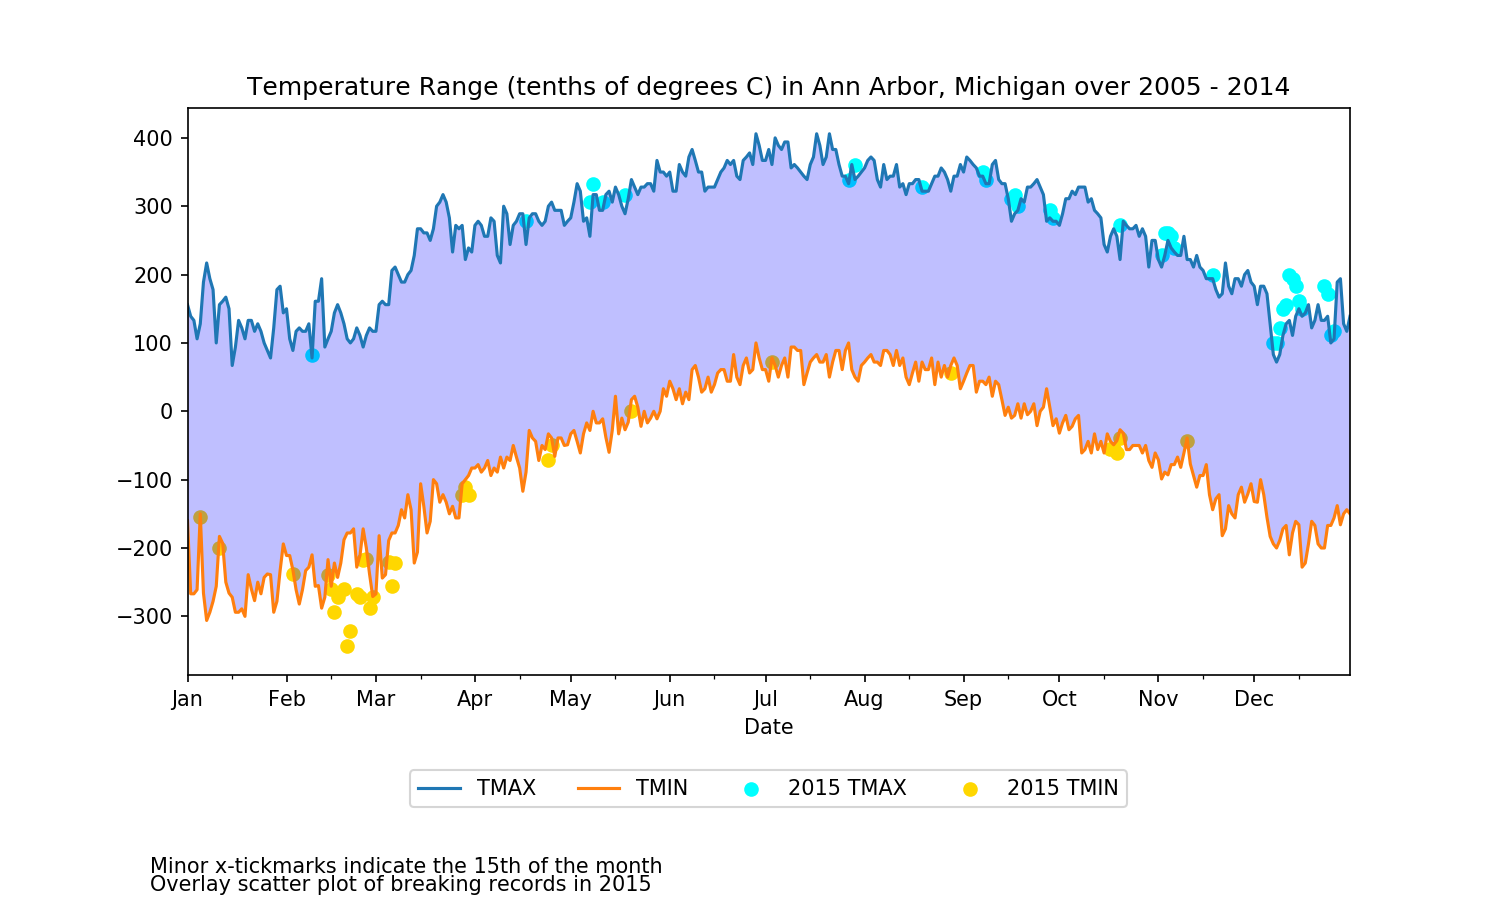

Text(0.5,0,'Date')

Text(0.5,1,'Temperature Range (tenths of degrees C) in Ann Arbor, Michigan over 2005 - 2014')

(<matplotlib.lines.Line2D object at 0x0000022F5A2AD160>, 'TMAX') (<matplotlib.lines.Line2D object at 0x0000022F5A2D2898>, 'TMIN') (<matplotlib.collections.PathCollection object at 0x0000022F5A2AAF28>, 'TMAX_15x') (<matplotlib.collections.PathCollection object at 0x0000022F5A2AA438>, 'TMIN_15x')


2014-12-13 19:12:00+00:00 2016-01-18 04:48:00+00:00


(735599.0, 735963.0)

2015-01-01 00:00:00+00:00 2015-12-31 00:00:00+00:00


In [319]:
%matplotlib notebook
fig = plt.figure(figsize=(10,6))

#Add year to string 'mm-dd' to create a full calendar date as x values for plotting
#Make sure the year picked is not a leap year
idx = list(map(lambda x : pd.to_datetime('2015-'+x), table.index))

#Line graphs
tmax = plt.plot(idx, table['TMAX'])
tmin = plt.plot(idx, table['TMIN'])

#Scatter plot for 2015 highs and lows
scat_max=plt.scatter(x=idx, y=table['TMAX_15x'], c='cyan')
scat_min=plt.scatter(x=idx, y=table['TMIN_15x'], c='gold')

#Fill the area between the linear data and exponential data
plt.gca().fill_between(idx, 
                       table['TMIN'], table['TMAX'], 
                       facecolor='blue', 
                       alpha=0.25) 

plt.xlabel('Date')
plt.title('Temperature Range (tenths of degrees C) in Ann Arbor, Michigan over 2005 - 2014')

#Modify legend
handles, labels = plt.gca().get_legend_handles_labels()
print(*zip(handles, labels))

plt.legend(handles=handles,
           labels = ['TMAX', 'TMIN', '2015 TMAX', '2015 TMIN'], loc = 'upper center'
           , bbox_to_anchor = (0.5,-0.15), ncol=4)


#Show 1st and 15th of the month in xticks
x = plt.gca().xaxis

# rotate the tick labels for the x axis
# for item in x.get_ticklabels():
#     item.set_rotation(45)
    
import matplotlib.dates as mdates
maj_locator = mdates.DayLocator(bymonthday=1, interval=1, tz=None)
min_locator = mdates.DayLocator(bymonthday=15, interval=1, tz=None)
x.set_major_locator(maj_locator)
x.set_minor_locator(min_locator)

maj_formatter= mdates.DateFormatter('%b')
min_formatter= mdates.DateFormatter('%d')
x.set_major_formatter(maj_formatter)
# x.set_minor_formatter(min_formatter)  #Comment out to show just tick mark without value

#Add caption
## Remove any existing figure text first
for txt in fig.texts:
    txt.set_visible(False)
txt =fig.text(0.1, 0.03, 'Minor x-tickmarks indicate the 15th of the month', horizontalalignment='left')
txt1 =fig.text(0.1, 0.01, 'Overlay scatter plot of breaking records in 2015', horizontalalignment='left')


#Set xlim to elimiate side space
left, right = plt.xlim() 
print(mdates.num2date(left), mdates.num2date(right))

plt.xlim(idx[0], idx[-1])
left, right = plt.xlim() 
print(mdates.num2date(left), mdates.num2date(right))

plt.subplots_adjust(bottom=0.25)

In [318]:
# scat_max.remove()
# scat_min.remove()